# PEPCONF - Throughput Troubleshooting - DLC

In [1]:
import sys
sys.path.append('../../management/')

In [2]:
import management as mgt
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from qcportal import FractalClient

In [5]:
client = FractalClient.from_file()

In [6]:
ds = client.get_collection("OptimizationDataset", "OpenFF PEPCONF OptimizationDataset v1.0")

In [7]:
ds.status('default')

,default
ERROR,5749
COMPLETE,1805
INCOMPLETE,6


In [8]:
ds.status('default-dlc')

,default-dlc
INCOMPLETE,5184
COMPLETE,2101
ERROR,275


In [9]:
ds.df

,default,default-dlc
CC(=O)N[C@@H](CCC(=O)[O-])C(=O)N[C@@H](Cc1ccccc1)C(N)=O-0,"OptimizationRecord(id='31712605', status='COMP...","OptimizationRecord(id='34752545', status='COMP..."
CC(=O)N[C@@H](CCC(=O)[O-])C(=O)N[C@@H](Cc1ccccc1)C(N)=O-1,"OptimizationRecord(id='31712606', status='COMP...","OptimizationRecord(id='34752563', status='COMP..."
CC(=O)N[C@@H](CO)C(=O)N[C@@H](CO)C(N)=O-0,"OptimizationRecord(id='31712607', status='COMP...","OptimizationRecord(id='34752569', status='COMP..."
CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O-0,"OptimizationRecord(id='31712608', status='COMP...","OptimizationRecord(id='34752579', status='COMP..."
CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O-1,"OptimizationRecord(id='31712609', status='COMP...","OptimizationRecord(id='34752588', status='COMP..."
...,...,...
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-8,"OptimizationRecord(id='31729737', status='ERROR')","OptimizationRecord(id='34760012', status='INCO..."
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-9,"OptimizationRecord(id='31729738', status='ERROR')","OptimizationRecord(id='34760016', status='INCO..."
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-10,"OptimizationRecord(id='31729739', status='ERROR')","OptimizationRecord(id='34760022', status='INCO..."
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-11,"OptimizationRecord(id='31729740', status='ERROR')","OptimizationRecord(id='34760027', status='INCO..."


In [10]:
opts = ds.df['default-dlc'].tolist()

In [11]:
prov = {opt.id: opt.provenance.dict() for opt in opts if opt.provenance}

In [12]:
df_prov = pd.DataFrame(prov).T
df_prov

,creator,version,routine,cpu,username,wall_time,qcengine_version,hostname
34752545,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,tgokey,6539.296866,v0.17.0,hpc3-15-01
34752563,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,tgokey,5421.562176,v0.17.0,hpc3-17-18
34752569,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,AMD EPYC 7252 8-Core Processor,qcfractal,2498.499354,v0.17.0,openff-qca-qm-6ccb789c57-zx2rm
34752579,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz,qcfractal,3553.745419,v0.17.0,openff-qca-qm-6ccb789c57-q5fq6
34752588,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,tgokey,2795.288528,v0.17.0,hpc3-15-20
...,...,...,...,...,...,...,...,...
34759668,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz,chodera,6316.978566,v0.17.0,lt07
34759795,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,tgokey,13674.553815,v0.17.0,hpc3-15-04
34759800,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,tgokey,12100.720017,v0.17.0,hpc3-14-06
34759819,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,tgokey,14538.365372,v0.17.0,hpc3-15-03


In [13]:
df_prov.username.value_counts()

tgokey       837
chodera      647
qcfractal    617
Name: username, dtype: int64

In [14]:
df_prov['wall_time_hours'] = df_prov.wall_time.astype(float)/3600

In [15]:
name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI'}

In [16]:
df_prov['resource'] = df_prov['username'].apply(lambda x: name_map[x])

## Walltime distributions by resource

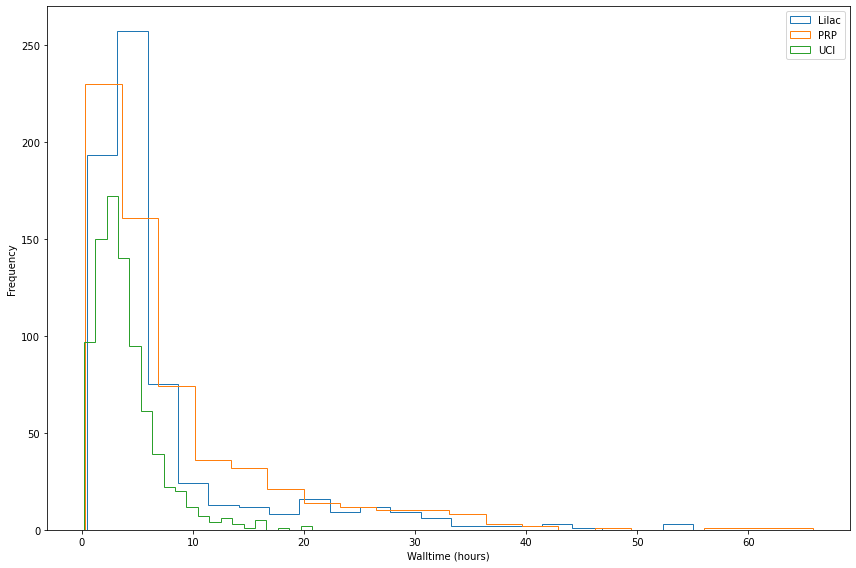

In [17]:
fig, ax = plt.subplots()

(df_prov.groupby('resource').wall_time_hours).plot.hist(bins=20, histtype='step', legend=True, figsize=(12, 8), ax=ax)

ax.set_xlabel("Walltime (hours)")

fig.tight_layout()
fig.savefig('walltime.pdf', dpi=300)

In [18]:
len(opts)

7560

Get distribution of optimization steps.

Try to analyze error distribution across compute resources.

In [19]:
df_prov.wall_time_hours.describe()

count    2101.000000
mean        6.194757
std         7.228323
min         0.187429
25%         2.429391
50%         3.882874
75%         6.556333
max        65.843048
Name: wall_time_hours, dtype: float64

## Measuring Throughput

In [20]:
modified_on = {opt.id: opt.modified_on for opt in opts if opt.provenance}

In [21]:
df_prov['modified_on'] = pd.Series(modified_on)

In [22]:
df_prov.modified_on.describe()

/home/david/.conda/envs/qca-submission/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                           2101
unique                          2101
top       2021-02-02 05:33:37.800133
freq                               1
first     2021-01-31 05:43:00.099248
last      2021-02-05 16:32:19.255762
Name: modified_on, dtype: object

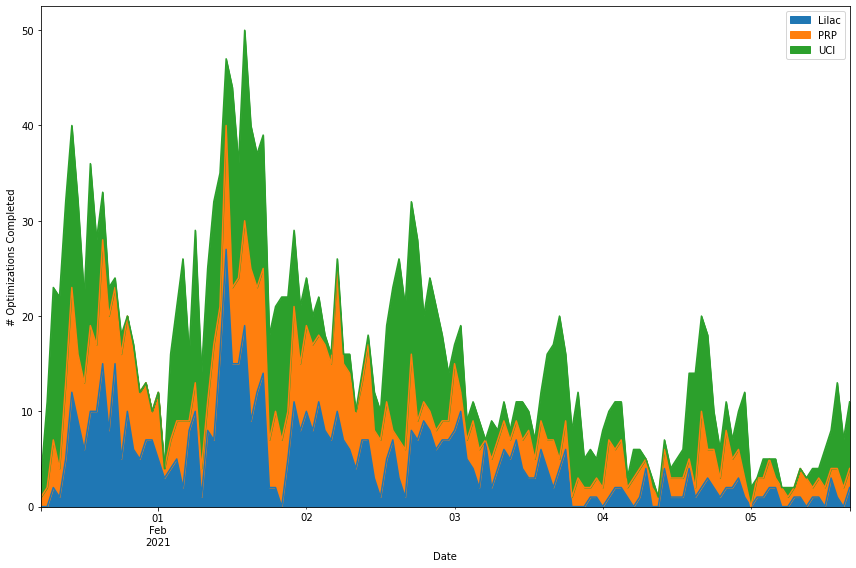

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI'}
counts = {}
for name, group in df_prov.reset_index().set_index('modified_on').groupby('username'):
    counts[name_map[name]] = group.groupby((pd.Grouper(freq='H')))['index'].count()

counts = pd.DataFrame(counts)
counts.plot.area(ax=ax)
ax.legend()

ax.set_ylabel("# Optimizations Completed")
ax.set_xlabel("Date")

fig.tight_layout()
fig.savefig('throughput.pdf', dpi=300)

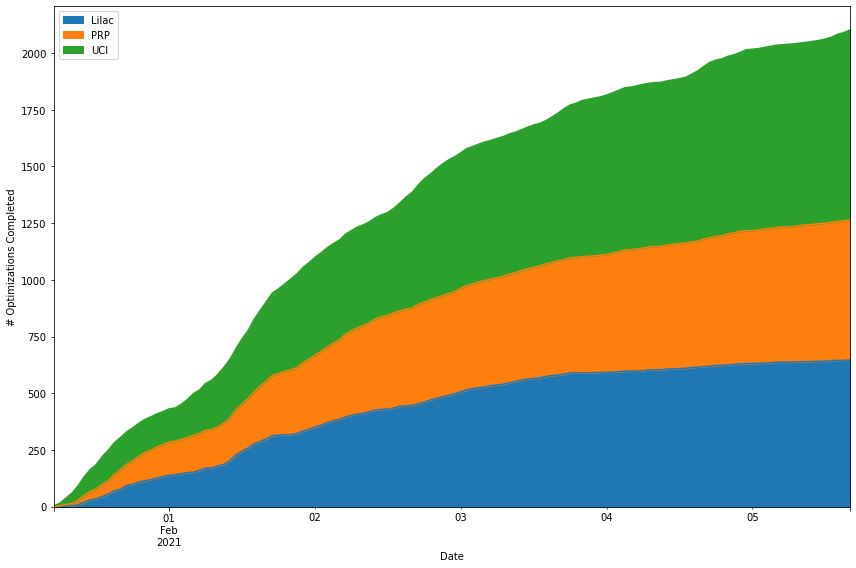

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI'}
counts = {}
for name, group in df_prov.reset_index().set_index('modified_on').groupby('username'):
    counts[name_map[name]] = group.groupby((pd.Grouper(freq='H')))['index'].count()

counts = pd.DataFrame(counts).cumsum()
counts.plot.area(ax=ax)
ax.legend()

ax.set_ylabel("# Optimizations Completed")
ax.set_xlabel("Date")

fig.tight_layout()
fig.savefig('throughput_cumulative.pdf', dpi=300)

In [25]:
len(opts)

7560

In [26]:
from datetime import datetime

In [27]:
elapsed = (datetime.utcnow() - df_prov['modified_on'].sort_values().iloc[0])

In [28]:
len(df_prov) / (elapsed.total_seconds()/3600/24)

385.4106022711089

In [29]:
ds.df[ds.df.apply(lambda x: (x['default'].status == 'ERROR') and (x['default-dlc'].status == 'COMPLETE'), axis=1)]

,default,default-dlc
CC(=O)N[C@@H](CCCNC(N)=[NH2+])C(=O)N[C@@H](CC(C)C)C(N)=O-0,"OptimizationRecord(id='31712617', status='ERROR')","OptimizationRecord(id='34752668', status='COMP..."
CC(=O)N[C@@H](CCCNC(N)=[NH2+])C(=O)N[C@@H](CC(C)C)C(N)=O-1,"OptimizationRecord(id='31712618', status='ERROR')","OptimizationRecord(id='34752681', status='COMP..."
CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(N)=O-0,"OptimizationRecord(id='31712853', status='ERROR')","OptimizationRecord(id='34752835', status='COMP..."
CC(=O)N[C@@H](CCCNC(N)=[NH2+])C(=O)N[C@@H](Cc1ccccc1)C(N)=O-2,"OptimizationRecord(id='31712858', status='ERROR')","OptimizationRecord(id='34752878', status='COMP..."
CC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](CC(N)=O)C(N)=O-1,"OptimizationRecord(id='31712866', status='ERROR')","OptimizationRecord(id='34752978', status='COMP..."
...,...,...
CC(=O)N[C@@H](CCCC[NH3+])C(=O)N[C@@H](CCCNC(N)=[NH2+])C(=O)N[C@@H](CO)C(=O)N[C@@H](CCCNC(N)=[NH2+])C(N)=O-4,"OptimizationRecord(id='31728623', status='ERROR')","OptimizationRecord(id='34759641', status='COMP..."
C[C@@H]1NC(=O)[C@@H]2CCCN2C(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H]2CCCN2C1=O-1,"OptimizationRecord(id='31729093', status='ERROR')","OptimizationRecord(id='34759668', status='COMP..."
CC(C)C[C@@H]1NC(=O)[C@@H](C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C@@H]2CCCCN2C1=O-0,"OptimizationRecord(id='31729356', status='ERROR')","OptimizationRecord(id='34759795', status='COMP..."
CC(C)C[C@@H]1NC(=O)[C@@H](C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C@@H]2CCCCN2C1=O-5,"OptimizationRecord(id='31729361', status='ERROR')","OptimizationRecord(id='34759819', status='COMP..."


In [30]:
ds.df[ds.df.apply(lambda x: (x['default'].status == 'COMPLETE') and (x['default-dlc'].status == 'ERROR'), axis=1)]

,default,default-dlc
CC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(N)=O-1,"OptimizationRecord(id='31714175', status='COMP...","OptimizationRecord(id='34753225', status='ERROR')"
CC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(N)=O-0,"OptimizationRecord(id='31714220', status='COMP...","OptimizationRecord(id='34752597', status='ERROR')"
CC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(N)=O-1,"OptimizationRecord(id='31714221', status='COMP...","OptimizationRecord(id='34752617', status='ERROR')"
CC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(N)=O-2,"OptimizationRecord(id='31714222', status='COMP...","OptimizationRecord(id='34752628', status='ERROR')"
CC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(N)=O-7,"OptimizationRecord(id='31714227', status='COMP...","OptimizationRecord(id='34752695', status='ERROR')"
CC(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CCC(=O)O)C(N)=O-0,"OptimizationRecord(id='31714670', status='COMP...","OptimizationRecord(id='34754493', status='ERROR')"
CSCC[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](Cc1ccc(O)cc1)NC(C)=O)C(N)=O-4,"OptimizationRecord(id='31715341', status='COMP...","OptimizationRecord(id='34754016', status='ERROR')"
CSCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](CCC(N)=O)NC(C)=O)C(N)=O-3,"OptimizationRecord(id='31716729', status='COMP...","OptimizationRecord(id='34754038', status='ERROR')"
CC(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CSSC[C@H](NC(=O)[C@@H](NC(C)=O)C(C)C)C(=O)N[C@@H](CCC(N)=O)C(N)=O)C(=O)N1CCC[C@H]1C(N)=O-1,"OptimizationRecord(id='31717916', status='COMP...","OptimizationRecord(id='34754021', status='ERROR')"
CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CSSC[C@H](NC(=O)[C@H](Cc1ccccc1)NC(C)=O)C(=O)NCC(N)=O)C(=O)N1CCC[C@H]1C(N)=O-7,"OptimizationRecord(id='31718002', status='COMP...","OptimizationRecord(id='34753926', status='ERROR')"


## Upping priority

In [31]:
incomplete = [opt for opt in opts if opt.status != 'COMPLETE']

In [32]:
len(incomplete)

5459

In [33]:
mgt.reprioritize_optimizations(incomplete, client, 'normal')

Reprioritized result`34752892` with `normal
Reprioritized result`34752988` with `normal
Reprioritized result`34753569` with `normal
Reprioritized result`34752853` with `normal
Reprioritized result`34752921` with `normal
Reprioritized result`34753401` with `normal
Reprioritized result`34753409` with `normal
Reprioritized result`34753536` with `normal
Reprioritized result`34752643` with `normal
Reprioritized result`34752651` with `normal
Reprioritized result`34752870` with `normal
Reprioritized result`34752959` with `normal
Reprioritized result`34752968` with `normal
Reprioritized result`34753628` with `normal
Reprioritized result`34753197` with `normal
Reprioritized result`34753322` with `normal
Reprioritized result`34753417` with `normal
Reprioritized result`34753630` with `normal
Reprioritized result`34753324` with `normal
Reprioritized result`34753441` with `normal
Reprioritized result`34753477` with `normal
Reprioritized result`34753487` with `normal
Reprioritized result`34752923` w